# Simulated Annealing Demo

Skrypt przedstawia przykładową implementację algorytmu symulowanego wyżarzania (ang. Simulated Annealing, SA) i jego zastosowanie do rozwiązywania problemu Quadratic Assignment Problem (QAP). Problem jest dokładnie opisany m.in. w pracy Burkarda i innych [1]. Popularne instancje problemu QAP można znaleźć w bibliotece QAPLib [2]. Skrypt skupia się na rozwiązywaniu instancji NUG12 [3], w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu.

Literatura:

[1]  Burkard, R., Cela, E., Pardalos, P., Pitsoulis, L., "The Quadratic Assignment Problem", http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.217.1914

[2] QAPLIB, http://anjos.mgi.polymtl.ca/qaplib/

[3] NUG12, http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request

%matplotlib inline

In [42]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug22.dat'

## Reading input data

In [43]:
qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

line = qap_instance_file.readline()
n = int(line.decode()[:-1].split()[0])
print('Problem size: %d' % n)

A = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    A[i, :] = list(map(int, line.decode()[:-1].split()))
print('Flow matrix:\n', A)

B = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    B[i, :] = list(map(int, line.decode()[:-1].split()))
print('Distance matrix:\n', B)

Problem size: 22
Flow matrix:
 [[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.   1.   2.   3.
    4.   5.   6.   7.   8.   9.  10.  11.]
 [  1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.   2.   1.   2.
    3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   3.   2.   1.
    2.   3.   4.   5.   6.   7.   8.   9.]
 [  3.   2.   1.   0.   1.   2.   3.   4.   5.   6.   7.   4.   3.   2.
    1.   2.   3.   4.   5.   6.   7.   8.]
 [  4.   3.   2.   1.   0.   1.   2.   3.   4.   5.   6.   5.   4.   3.
    2.   1.   2.   3.   4.   5.   6.   7.]
 [  5.   4.   3.   2.   1.   0.   1.   2.   3.   4.   5.   6.   5.   4.
    3.   2.   1.   2.   3.   4.   5.   6.]
 [  6.   5.   4.   3.   2.   1.   0.   1.   2.   3.   4.   7.   6.   5.
    4.   3.   2.   1.   2.   3.   4.   5.]
 [  7.   6.   5.   4.   3.   2.   1.   0.   1.   2.   3.   8.   7.   6.
    5.   4.   3.   2.   1.   2.   3.   4.]
 [  8.   7.   6.   5.   4.   3.   2.   1.   0.   

## Objective function

In [44]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [5]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(qap_objective_function(p), p)

ValueError: operands could not be broadcast together with shapes (14,) (12,) 

## Random Sampling

In [6]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(qap_objective_function(p), p)

101.19657373428345
602.0 [ 3  7  2 11  0  6 10  8  4  5  9  1]


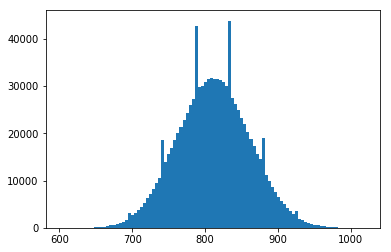

811.966302 49.6820157043


In [7]:
plt.figure()
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [7]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [39]:
T = 500000
radius = 1
alpha = 0.9

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

62.68988561630249 578.0


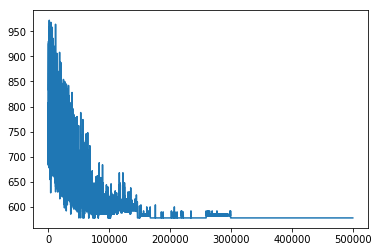

In [40]:
plt.figure()
plt.plot(costs)
plt.show()

1)
a)
T = 500000
radius = 1
alpha = 0.9
works on 12, 14, 15, 16b

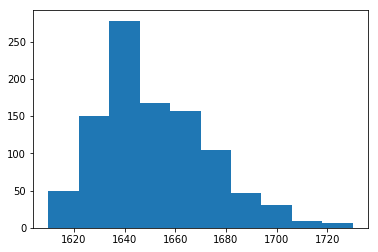

In [48]:
# for 16a
T = 5000
C = 1000
radius = 1
alpha = 0.9

results = np.zeros(C)
for c in range(C):
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
    results[c] = costs.min()
    
plt.figure()
plt.hist(results, bins=10)
plt.show()


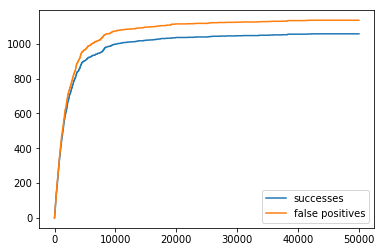

In [15]:
T = 50000
radius = 1
alpha = 0.9

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)

succs = np.zeros(T+1)
false_pos = np.zeros(T+1)

for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
        succs[t+1] = succs[t] + 1
        false_pos[t+1] = false_pos[t]
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
        succs[t+1] = succs[t]
        false_pos[t+1] = false_pos[t] + 1
    else:
        succs[t+1] = succs[t]
        false_pos[t+1] = false_pos[t]

plt.figure()
s_plot, = plt.plot(succs, label="successes")
fp_plot, = plt.plot(false_pos, label="false positives")
plt.legend([s_plot, fp_plot], ['successes', 'false positives'])
plt.show()

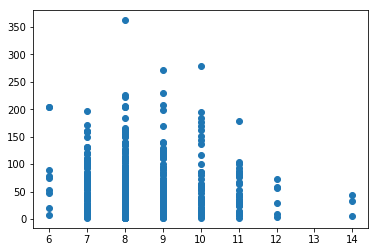

In [26]:
def perm_dist(p1, p2):
    return sum([e1 == e2 for e1, e2 in zip(p1, p2)])


T = 50000
radius = 5
alpha = 0.9

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)

succs_dists = []

for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        succs_dists.append((perm_dist(p, q), p_cost - q_cost))
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost

plt.figure()
plt.scatter(*zip(*succs_dists))
plt.show()

3596.0


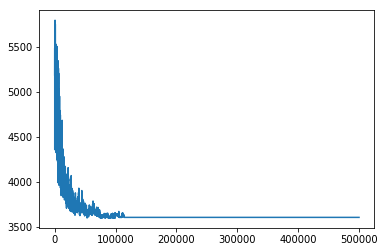

In [50]:
T = 500000
radius = 1
alpha = 1
base_alpha = alpha


t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
        alpha = base_alpha
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
        alpha = base_alpha
    else:
        alpha = 1.001 * alpha
    costs[t] = p_cost
    
print(costs.min())
    
plt.figure()
plt.plot(costs)
plt.show()

In [29]:
# 2
import random
T = 10000

def random_invidual(p):
    return np.array([r < e for r, e in zip(np.random.rand(len(p)), p)])

def random_population(p, N):
    return [random_invidual(p) for i in range(N)]

def pbil(d, F, N, l, m_p, m_c):
    p = [0.5 for i in range(d)]
    population = random_population(p, N)
    results = list(map(F, population))
    for t in range(T):
        _, best = max(enumerate(population), key=lambda i: results[i[0]])
        for i in range(len(p)):
            p[i] = p[i] * (1 - l) + l * best[i]
            if random.randint(0, 1) < m_p:
                p[i] = p[i] * (1 - m_c) + random.randint(0, 1) * m_c
        population = random_population(p, N)
        results = list(map(F, population))
        if t % 1000 == 0:
            print(t, sum(p))
    return sum(p)


In [86]:
def OneMax(ind):
    return ind.sum()

def DeceptiveOneMax(ind):
    s = ind.sum()
    if s == 0:
        return ind.size + 1
    return s

def K_DeceptiveOneMax(K):
    def aux(ind):
        s_global = 0
        for i in range(ind.size // K):
            s = ind[i*K:(i+1)*K].sum()
            if s == 0:
                s_global = s_global + K + 1
            else:
                s_global = s_global + s
        return s_global
    return aux

In [87]:
print(pbil(100, OneMax, 24, 0.01, 0.1, 0.02))

0 50.0492
1000 59.0210489169
2000 58.1203073319
3000 59.475293234
4000 59.631123503
5000 59.0870918361
6000 60.5521971107
7000 58.9717099102
8000 59.653176206
9000 58.5780279728
58.1229070087


In [88]:
print(pbil(100, OneMax, 24, 0.01, 0.01, 0.02))

0 49.9001
1000 59.9225748426
2000 59.3640072897
3000 58.8944896204
4000 59.393550431
5000 60.5247514324
6000 59.4579450894
7000 59.0063580033
8000 59.2326754071
9000 59.4725164976
58.9006242903


In [91]:
print(pbil(100, OneMax, 24, 0.05, 0.01, 0.02))

0 50.533
1000 82.9901191109
2000 83.6921718859
3000 84.2656791711
4000 83.5255722419
5000 83.5974796566
6000 84.2804938303
7000 82.5480976437
8000 83.5125017153
9000 82.983277027
82.76810425


In [92]:
print(pbil(100, OneMax, 48, 0.05, 0.01, 0.02))

0 50.5155
1000 85.9595734005
2000 85.4753740875
3000 84.3650614035
4000 86.1800159482
5000 85.6610100285
6000 86.077570095
7000 85.4706184999
8000 85.2035998215
9000 86.8584000534
85.2156186426


In [95]:
print(pbil(100, OneMax, 48, 0.6, 0.01, 0.02))

0 57.752
1000 99.1275849592
2000 99.089027257
3000 98.9443432927
4000 99.2912584814
5000 99.1962470675
6000 99.2030396517
7000 99.1754614261
8000 99.2564721053
9000 99.2684436196
99.2061071346


In [98]:
print(pbil(200, OneMax, 48, 0.6, 0.01, 0.02))

0 110.056
1000 198.496112453
2000 198.423682207
3000 198.131303688
4000 198.152142156
5000 198.409464084
6000 198.25312546
7000 198.245671201
8000 198.541796742
9000 198.33035895
198.374546199


In [94]:
print(pbil(100, DeceptiveOneMax, 48, 0.4, 0.01, 0.02))

0 52.704
1000 98.8646772473
2000 98.487764297
3000 98.701620952
4000 98.783284721
5000 98.7773397578
6000 98.7059580358
7000 98.8170621845
8000 98.7927646607
9000 98.6346800415
98.859970372


In [96]:
print(pbil(100, K_DeceptiveOneMax(5), 48, 0.4, 0.01, 0.02))

0 48.044
1000 79.1634990981
2000 79.2173645428
3000 79.419893252
4000 79.1579012814
5000 79.4467004833
6000 79.2844526544
7000 79.044020308
8000 79.2813911052
9000 79.1331588763
79.3382381902


In [97]:
print(pbil(100, K_DeceptiveOneMax(5), 48, 0.2, 0.03, 0.02))

0 49.128
1000 78.6246271063
2000 78.6391293726
3000 78.7233329262
4000 78.6018154891
5000 78.5113801949
6000 78.3784019034
7000 78.3448183927
8000 78.4844246297
9000 78.6327281669
78.5253450158


In [101]:
print(pbil(100, K_DeceptiveOneMax(4), 48, 0.2, 0.04, 0.1))

0 51.96
1000 41.7508520658
2000 40.3126946338
3000 51.796816613
4000 48.4485766123
5000 47.7266734462
6000 45.0678467318
7000 41.5267271507
8000 39.0745466963
9000 55.4376244113
55.5069653847


In [100]:
print(pbil(100, K_DeceptiveOneMax(4), 48, 0.2, 0.3, 0.1))

0 50.14
1000 36.8439035395
2000 32.88386332
3000 42.5007065135
4000 34.6129756624
5000 35.7817108614
6000 40.0831853369
7000 41.8568052719
8000 32.4247195305
9000 36.6430861244
40.8330521034


In [102]:
print(pbil(100, K_DeceptiveOneMax(4), 48, 0.2, 0.04, 0.4))

0 53.72
1000 54.7105778886
2000 57.7527743213
3000 46.1168828503
4000 48.7964105043
5000 55.1658438911
6000 52.953336848
7000 47.2825635847
8000 51.4899980639
9000 52.1142121885
52.30453276


zadanie 3

In [ ]:
from scipy.stats import stats

d = 266
pixels = 9350
T = 1000
rules = np.ndarray(shape=(d, pixels))
image_expert = []

with open("./data/ClassificationRules.txt") as fh:
    for i, line in enumerate(fh):
        rules[i] = np.array(list(map(float, line.strip().split()))).reshape(1, 9350)

with open("./data/ImageExpertReduced.txt") as fh:
    image_expert = np.array(list(map(float, fh.read().strip().split())))

def pbil(d, F, N, l, m_p, m_c):
    p = [0.5 for i in range(d)]
    population = random_population(p, N)
    results = list(map(F, population))
    for t in range(T):
        if t % 10 == 0:
            print(t, max(results) / pixels)
        _, best = max(enumerate(population), key=lambda i: results[i[0]])
        for i in range(len(p)):
            p[i] = p[i] * (1 - l) + l * best[i]
            if random.randint(0, 1) < m_p:
                p[i] = p[i] * (1 - m_c) + random.randint(0, 1) * m_c
        population = random_population(p, N)
        results = list(map(F, population))
    return sum(p)

def classify_reward(d):
    chosen_rules = rules[d]
    classification = np.array(stats.mode(chosen_rules)[0][0])
    return (classification == image_expert).sum()
    
    
pbil(d, classify_reward, 50, 0.1, 0.05, 0.01)

0 0.907914438503
10 0.958502673797
20 0.970909090909
30 0.973262032086
40 0.977754010695
50 0.978181818182
60 0.98128342246
70 0.980320855615
80 0.980534759358
90 0.982139037433
100 0.981604278075
110 0.98128342246
120 0.982459893048
130 0.983315508021
140 0.983743315508
150 0.983743315508
160 0.98256684492
170 0.983529411765
180 0.983957219251
